In [32]:
import pandas as pd
import seaborn as sns; sns.set()
import re
import matplotlib.pyplot as plt

# Import Data
df = pd.read_csv("../data/scores/scores_v1.csv")

In [40]:
for index, row in df.iterrows():
    df.loc[index, 'lookback_window'] = int(re.sub("[^0-9]", "", row['dataset']))
    df.loc[index, 'aggr_type'] = row['dataset'].split(":")[0]

In [35]:
df.head(1)

,Unnamed: 0,dict_type,dataset,num_obs,model_name,accuracy,precision,recall,roc_auc,lookback_window,aggr_type
0,0,cumu_dfs_dict,Exact Data: 1 Fight Lookback Window,6914,LogisticRegression,0.530086,0.525787,0.468559,0.539459,1.0,Exact Data


In [36]:
df['aggr_type'].value_counts()

Cumulative Data    72
Exact Data         72
Name: aggr_type, dtype: int64

In [37]:
df.head()

,Unnamed: 0,dict_type,dataset,num_obs,model_name,accuracy,precision,recall,roc_auc,lookback_window,aggr_type
0,0,cumu_dfs_dict,Exact Data: 1 Fight Lookback Window,6914,LogisticRegression,0.530086,0.525787,0.468559,0.539459,1.0,Exact Data
1,1,cumu_dfs_dict,Exact Data: 1 Fight Lookback Window,6914,RandomForestClassifier,0.508678,0.500739,0.381243,0.509469,1.0,Exact Data
2,2,cumu_dfs_dict,Exact Data: 1 Fight Lookback Window,6914,SVC,0.520396,0.514446,0.448855,0.533860,1.0,Exact Data
3,3,cumu_dfs_dict,Exact Data: 1 Fight Lookback Window,6914,KNeighborsClassifier,0.505945,0.497994,0.496190,0.510326,1.0,Exact Data
4,4,cumu_dfs_dict,Exact Data: 1 Fight Lookback Window,6914,DecisionTreeClassifier,0.501309,0.493186,0.490897,0.501146,1.0,Exact Data


In [50]:
# subset data so that it only shows for 
cumulative_df = df.loc[df['aggr_type'] == "Cumulative Data"]
cumulative_df = cumulative_df[cumulative_df['dict_type'] == "cumu_dfs_dict"]

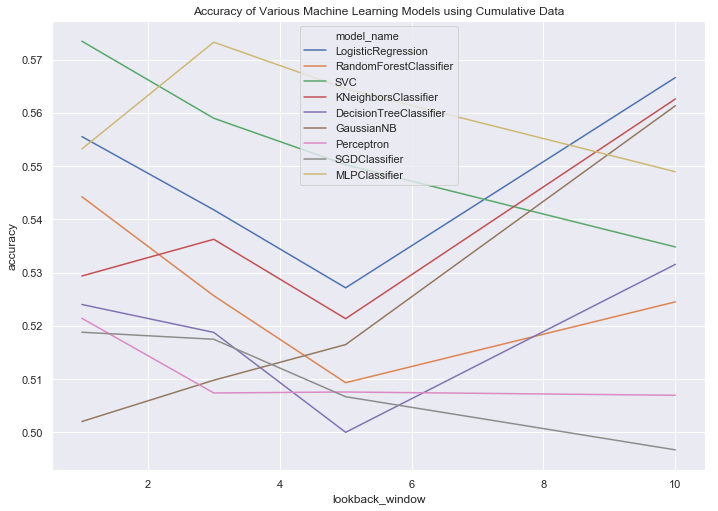

In [51]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

cumulative_plot = sns.lineplot(x="lookback_window", y="accuracy", hue="model_name", data = cumulative_df, ax = ax)
cumulative_plot = cumulative_plot.set_title("Accuracy of Various Machine Learning Models using Cumulative Data")

In [52]:
fig.savefig('../data/plots/cumulative_v1.png')

In [47]:
# subset data so that it only shows for 
exact_df = df.loc[df['aggr_type'] == "Exact Data"]
exact_df = exact_df[exact_df['dict_type'] == "cumu_dfs_dict"]

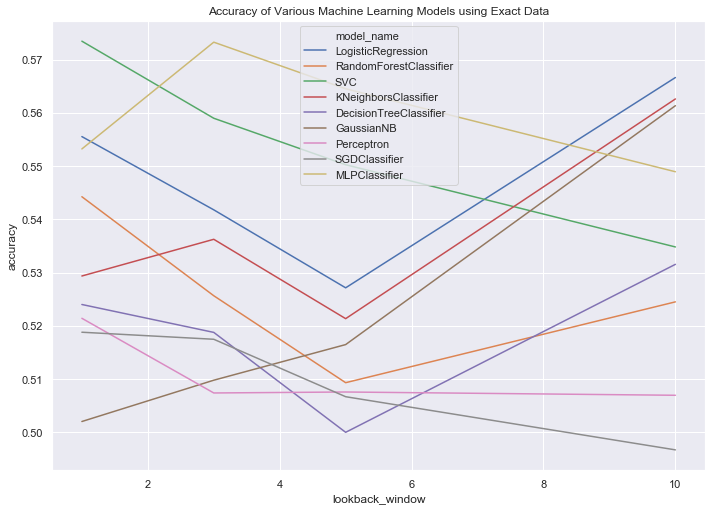

In [48]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

cumulative_plot = sns.lineplot(x="lookback_window", y="accuracy", hue="model_name", data = cumulative_df, ax = ax)
cumulative_plot = cumulative_plot.set_title("Accuracy of Various Machine Learning Models using Exact Data")

In [49]:
fig.savefig('../data/plots/exact_v1.png')

In [53]:
turn_in_df = df[df['dict_type'] == "cumu_dfs_dict"]

In [55]:
turn_in_df.to_csv("../data/scores/initial_scores.csv")